In [ ]:

#Ibo Dataset
!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/train.tsv
!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/test.tsv


#Hausa Dataset
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/hau/train.tsv
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/hau/test.tsv


# #Nigerian Pidgin dataset
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/pcm/train.tsv
#!wget https://github.com/afrisenti-semeval/afrisent-semeval-2023/tree/main/data/pcm/test.tsv



!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2
import tensorflow as tf
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import LSTM


from random import randint
#data_frame_ibo = pd.read_tsv("train.tsv", sep="\t", error_bad_lines=False)

import csv



--2023-04-25 17:41:49--  https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/train.tsv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train.tsv’

train.tsv               [ <=>                ]   3.80M  --.-KB/s    in 0.1s    

2023-04-25 17:41:50 (34.0 MB/s) - ‘train.tsv’ saved [3980584]

--2023-04-25 17:41:50--  https://github.com/afrisenti-semeval/afrisent-semeval-2023/blob/main/data/ibo/test.tsv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test.tsv’

test.tsv                [ <=>                ]   1.05M  --.-KB/s    in 0.05s   

2023-04-25 17:41:51 (22.2 MB/s) - ‘test.tsv’ saved [1097365]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

PRE-CLEANING CULTURE:
Setting up libraries and function for process unclean data into clean data

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Remove stop words
    # stop_words = set(stopwords.words('english'))
    # words = [w for w in words if not w in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Convert list of words back to string
    text = " ".join(words)
    
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


THE CLEANING PROCESS

In [ ]:
def clean(filename):
  data = []
  emotion = []
  with open(filename, 'r') as f:
      reader = csv.reader(f, delimiter='\t')
      for row in reader:
          soup = BeautifulSoup(str(row), 'html.parser')
          text = soup.text

          #Cleaning the data
          text = preprocess_text(text)

          if len(text.split(" ")) > 1:  #usernames are skipped
            emo = text[text.rindex(" ")+1:] #identifying the emotion since it is the last word at the end of every sentence
            
            if emo  == 'negative' or emo == 'positive' or emo == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
              data.append(text[:text.rindex(" ")])
              emotion.append(emo)
  return data, emotion

In [ ]:
data_r = []
emotion = []


data_r, emotion = clean("train.tsv")

emotion_sequence = []
for each_emotion in emotion:
  if each_emotion == 'negative':
    emotion_sequence.append(-1)
  if each_emotion == 'neutral':
    emotion_sequence.append(0)
  if each_emotion == 'positive':
    emotion_sequence.append(1)

#if validation is not part of train uncomment
# val_data, val_emotion = clean("dev.tsv")


<ipython-input-4-774c3e0b630c>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(row), 'html.parser')


CLEANED DATA SAMPLE

In [ ]:
data_r

['nna ike gwuru ooo 😂 httpstconds7jufbgd',
 'user chineke nna kezi mgbe ole',
 'lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw',
 'user haha fulani herdsman akpa amu gi retweet rie nsi 😝',
 'nna ghetto di gi na aru biko httpstco4g9bzi4ukg',
 'user ezigbo onye iberibe',
 'thief ole barawo onye oshi httpstcopzg1ohdp5v',
 'chukwu nna afam ị gaghị egbu mmadụ na app a httpstcosjaivdtwyp',
 'user or ma agbalie gi elu🙄',
 'user o dikwa egwu😂😂😂😂',
 'user lmao awka na ebi ajo ndu',
 'user nna ehh ụfọdụ ụmụ nwoke dara iberibe 🤦🏽u200d♂️',
 'user rapụ ndị nzuzu',
 'taa nnaa gaa zuru ike httpstcoizwxsftoc0',
 'nobody ugly oooo obu ego na akpari mmadu httpstcogdsquyjzkf',
 'user user user user user user user user user user user rijuo nsi onu dia nkea abuluzia gini alako kwana muna chairmo ooh before kitikpa agbasa gi isi',
 'negodu mama mmadu 🤦u200d♂️ httpstcogl9wfqqclz',
 'user user user nsogbu dị kwa ife corona na cause 😩😩',
 'user zuzuru getaway from here onye nkogheri',
 'user user 🤣 🤣 🤣 agwọ

DATA FRAMING

In [ ]:
data = pd.DataFrame({
    "text": data_r,
    "emotion": emotion
})

data

,text,emotion
0,nna ike gwuru ooo 😂 httpstconds7jufbgd,negative
1,user chineke nna kezi mgbe ole,negative
2,lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw,negative
3,user haha fulani herdsman akpa amu gi retweet rie nsi 😝,negative
4,nna ghetto di gi na aru biko httpstco4g9bzi4ukg,negative
...,...,...
10187,e mana mu na chineke aman nke wa🙏,positive
10188,oga jide daalu oo ezigbo mmadu httpstcohnhjrpwomi,positive
10189,celebration continue chukwu okike ekele m gi httpstcojbs3euiy9b,positive
10190,nwayi oma am ready 4 2nite user africalagos httpstcomp8jgszahi,positive


CONVERTING DATASET INTO NUMPY ARRAYS

In [ ]:
data = np.array(data[["text","emotion"]])


In [ ]:
data

array([['nna ike gwuru ooo 😂 httpstconds7jufbgd', 'negative'],
       ['user chineke nna kezi mgbe ole', 'negative'],
       ['lol isi adirokwanu gi nma 😐😒😒😒 httpstco5gzmgyk6rw', 'negative'],
       ...,
       ['celebration continue chukwu okike ekele m gi httpstcojbs3euiy9b', 'positive'],
       ['nwayi oma am ready 4 2nite user africalagos httpstcomp8jgszahi', 'positive'],
       ['user user user jisie ike imela kpa ole', 'positive']], dtype=object)

SETTING HYPER-PARAMETERS

In [ ]:
VOCAB_SIZE = 1024
BATCH_SIZE = 32
LEARNING_RATE = 0.01
EPOCH = 10
EMBEDDED_DIMENSION = 16
HIDDEN_LAYER = 10



SEPARATING TRAIN FROM VALIDATION

In [ ]:
train_data = []
train_emotion = []

val_data = []
val_emotion = []

selected = []
for i in range(int(len(data_r)*0.2)):
  selected.append(randint(0,len(data_r)))

for j in range(len(data_r)):
  if j in selected:
    val_data.append(data_r[j])
    val_emotion.append(emotion_sequence[j])
  else:
    train_data.append(data_r[j])
    train_emotion.append(emotion_sequence[j])

print("Training size:",len(train_data))
print("Validation size:",len(val_data))
print(len(data_r))

Training size: 8331
Validation size: 1861
10192


TOKENIZATION, SEQUENCING AND EMBEDDING OF TEXTS

In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)

# independent_words = tokenizer.word_index

train_text_sequences = tokenizer.texts_to_sequences(train_data)
padded_train_data = pad_sequences(train_text_sequences, maxlen=100, padding='post', truncating='post')

val_text_sequences = tokenizer.texts_to_sequences(val_data)
padded_val_data = pad_sequences(val_text_sequences, maxlen=100, padding='post', truncating='post')


# padded_train_data = Tensor([train_text_sequences])

# padded_train_data

In [ ]:
train_text_sequences

[[29, 21, 147, 155, 47, 1],
 [2, 58, 29, 1, 81, 281],
 [140, 40, 1, 4, 94, 1, 1],
 [2, 961, 1, 1, 301, 311, 4, 1, 346, 258, 1],
 [29, 1, 11, 4, 3, 175, 25, 1],
 [2, 45, 5, 235],
 [18, 29, 558, 96, 1, 259, 117, 3, 962, 9, 1],
 [2, 357, 30, 1, 4, 1],
 [2, 295, 398, 3, 724, 605, 77],
 [2, 29, 606, 772, 122, 54, 1, 235, 1],
 [2, 1, 36, 276],
 [141, 440, 466, 607, 21, 1],
 [1, 1, 316, 187, 49, 3, 1, 37, 1],
 [2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  258,
  59,
  236,
  188,
  1,
  211,
  1,
  1,
  891,
  1,
  324,
  399,
  441,
  1,
  4,
  40],
 [389, 414, 37, 1, 1],
 [2, 2, 2, 67, 51, 43, 42, 1, 3, 1, 1],
 [2, 2, 89, 89, 89, 1, 1, 5, 83, 23, 1, 1, 1],
 [2, 2, 1, 1, 59, 4, 55, 268, 1, 17, 9],
 [2, 2, 1, 14, 11, 725, 3, 48, 1, 1, 7, 40],
 [14, 15, 5, 276, 1, 1],
 [2, 12, 530, 13, 114, 3, 1, 127, 7, 24, 3, 175],
 [2, 2, 47, 47, 7, 606, 8, 641, 22],
 [14, 3, 1, 10, 276, 59, 1],
 [2, 1, 963, 38, 248, 153, 213, 99, 126],
 [2, 2, 96, 3, 1, 1, 156, 400, 216],
 [2, 2, 25, 1, 16, 

CONFIGURING THE MODEL

In [ ]:
neural = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDED_DIMENSION,input_length=100),

    tf.keras.layers.Bidirectional(LSTM(24)),

    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(LEARNING_RATE)),

    tf.keras.layers.Dense(3, activation='softmax')
])

neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           16384     
                                                                 
 bidirectional (Bidirectiona  (None, 48)               7872      
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 16)                784       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 25,091
Trainable params: 25,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_emotion = tf.keras.utils.to_categorical(train_emotion, num_classes=3)
val_emotion = tf.keras.utils.to_categorical(val_emotion, num_classes=3)


In [ ]:
learned_outputs = neural.fit(
    padded_train_data.tolist(), train_emotion.tolist(), epochs=EPOCH, batch_size = BATCH_SIZE,
    validation_data=(padded_val_data.tolist(), val_emotion.tolist()),
    verbose=2
)

Epoch 1/10
261/261 - 29s - loss: 1.0660 - accuracy: 0.5247 - val_loss: 0.8423 - val_accuracy: 0.6330 - 29s/epoch - 112ms/step
Epoch 2/10
261/261 - 19s - loss: 0.8006 - accuracy: 0.6413 - val_loss: 0.7781 - val_accuracy: 0.6486 - 19s/epoch - 73ms/step
Epoch 3/10
261/261 - 19s - loss: 0.7527 - accuracy: 0.6512 - val_loss: 0.7758 - val_accuracy: 0.6389 - 19s/epoch - 73ms/step
Epoch 4/10
261/261 - 20s - loss: 0.7339 - accuracy: 0.6592 - val_loss: 0.7610 - val_accuracy: 0.6497 - 20s/epoch - 78ms/step
Epoch 5/10
261/261 - 19s - loss: 0.7147 - accuracy: 0.6663 - val_loss: 0.7555 - val_accuracy: 0.6507 - 19s/epoch - 74ms/step
Epoch 6/10
261/261 - 19s - loss: 0.6930 - accuracy: 0.6838 - val_loss: 0.7457 - val_accuracy: 0.6835 - 19s/epoch - 72ms/step
Epoch 7/10
261/261 - 18s - loss: 0.6326 - accuracy: 0.7514 - val_loss: 0.6584 - val_accuracy: 0.7394 - 18s/epoch - 70ms/step
Epoch 8/10
261/261 - 21s - loss: 0.5556 - accuracy: 0.7928 - val_loss: 0.6542 - val_accuracy: 0.7474 - 21s/epoch - 79ms/step

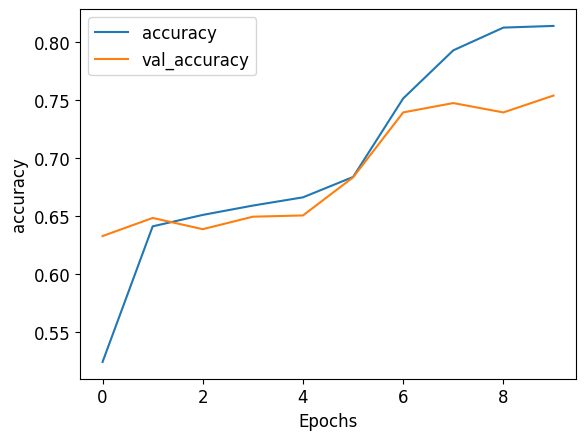

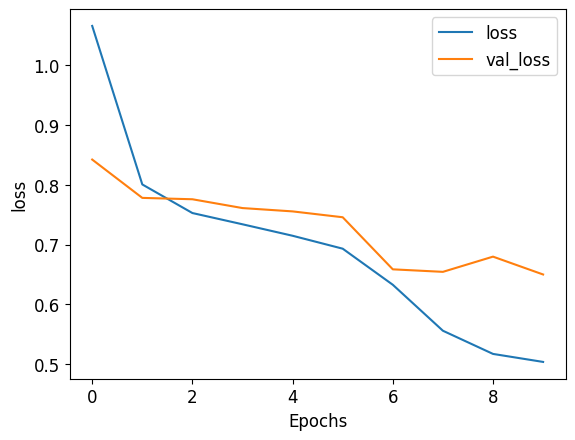

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(learned_outputs, "accuracy")
plot_graphs(learned_outputs, "loss")

TESTING

In [ ]:
def cleanTest(filename):
  data = []
  emotion = []
  tweet = False
  with open(filename, 'r') as f:
      reader = csv.reader(f, delimiter='\t')
      for row in reader:
          soup = BeautifulSoup(str(row), 'html.parser')
          text = soup.text
          
          ## Cleaning the data
          text = preprocess_text(text)
          if text == 'tweet':
            tweet = True
            continue

          if tweet:
            if len(text) == 0:
              continue

            if text  == 'negative' or text == 'positive' or text == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
              emotion.append(text)
            else:
              data.append(text)
          
          # if len(text.split(" ")) > 1:  #usernames are skipped
          #   emo = text[text.rindex(" ")+1:] #identifying the emotion since it is the last word at the end of every sentence
            
          #   if emo  == 'negative' or emo == 'positive' or emo == 'neutral': #filtering chuff [e.g words about the website which has noting to do with the conversation]
          #     data.append(text[:text.rindex(" ")])
          #     emotion.append(emo)
  return data, emotion

In [ ]:
data_t, emotion_t = cleanTest("test.tsv")


<ipython-input-19-8d22880c25e8>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(row), 'html.parser')


In [ ]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(data_t)


emotion_sequence = []
for each_emotion in emotion_t:
  if each_emotion == 'negative':
    emotion_sequence.append(-1)
  if each_emotion == 'neutral':
    emotion_sequence.append(0)
  if each_emotion == 'positive':
    emotion_sequence.append(1)


emotion_sequence = tf.keras.utils.to_categorical(emotion_sequence, num_classes=3)


# Evaluate the model on test data
test_loss, test_acc = neural.evaluate(data_t[:len(emotion_t)], emotion_sequence.tolist(), verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


# Make predictions on new data
predictions = neural.predict(new_data)



ValueError: ignored